# EX1. 

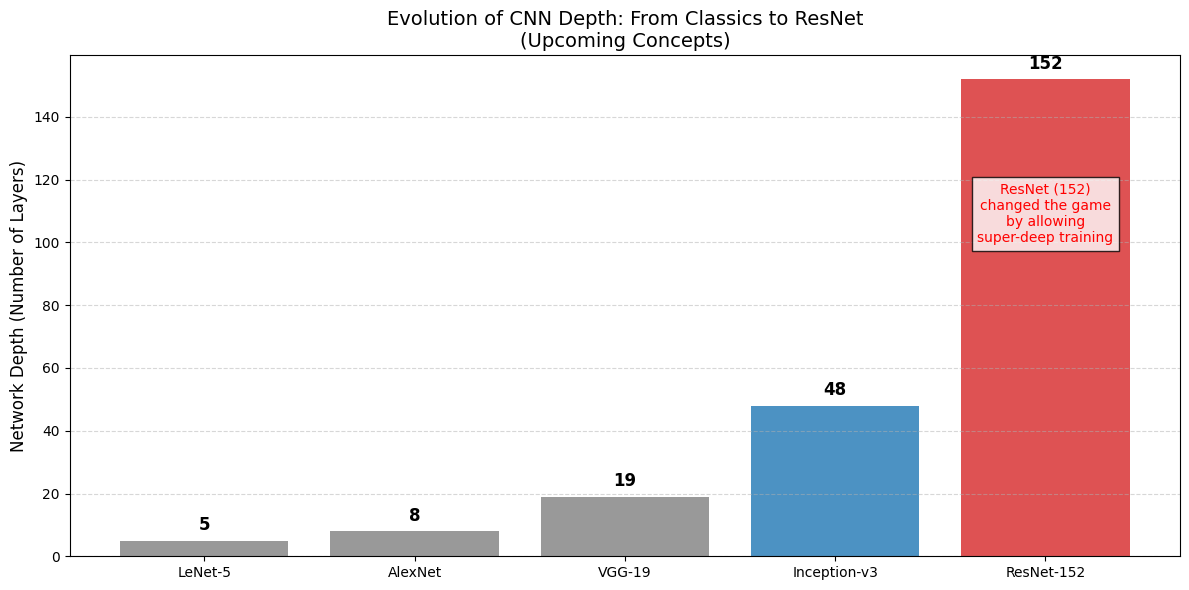

In [1]:
### Full Visualization Implementation
'''
This visualization illustrates the **evolution of network depth** mentioned in the transcript, 
comparing the "Classics" (LeNet, AlexNet) to the "Deep" networks (ResNet-152).
'''
import matplotlib.pyplot as plt
import numpy as np

def visualize_network_depths():
    # Data based on the architectures mentioned in the transcript
    networks = ['LeNet-5', 'AlexNet', 'VGG-19', 'Inception-v3', 'ResNet-152']
    
    # Approximate number of layers (depth)
    # LeNet-5 (5 layers), AlexNet (8 layers), VGG-19 (19 layers)
    # Inception (~48 layers), ResNet (152 layers)
    depths = [5, 8, 19, 48, 152]
    
    # Colors to distinguish "Classic" vs "Deep"
    colors = ['gray', 'gray', 'gray', 'tab:blue', 'tab:red']

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create Bar Chart
    bars = ax.bar(networks, depths, color=colors, alpha=0.8)
    
    # Add labels
    ax.set_ylabel('Network Depth (Number of Layers)', fontsize=12)
    ax.set_title('Evolution of CNN Depth: From Classics to ResNet\n(Upcoming Concepts)', fontsize=14)
    
    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Highlight ResNet
    ax.text(4, 100, "ResNet (152)\nchanged the game\nby allowing\nsuper-deep training", 
            ha='center', color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

visualize_network_depths()

# EX2

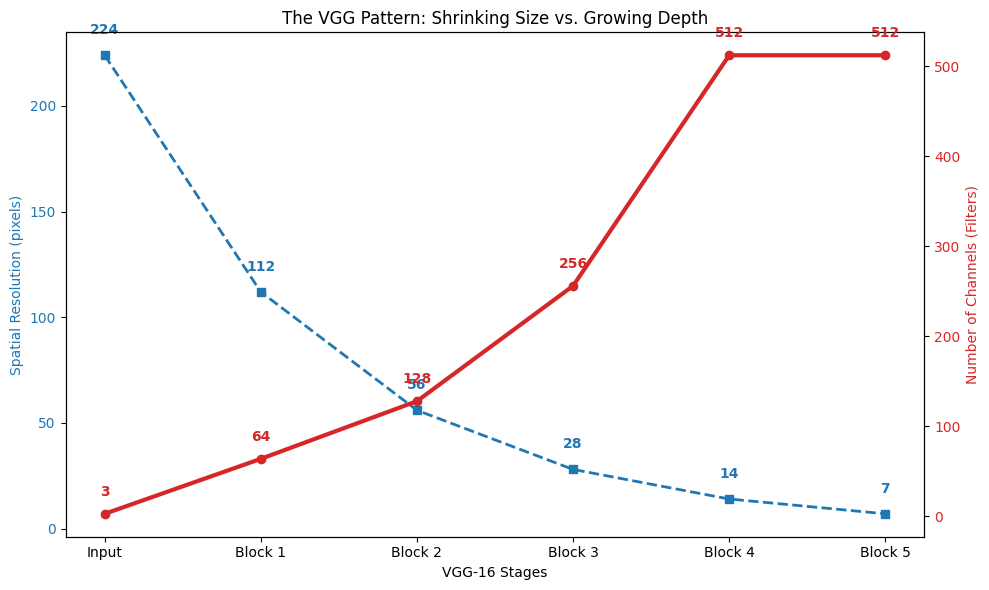

In [2]:
### Full Visualization Implementation
'''
This visualization plots the **"Doubling Pattern"** of VGG-16, contrasting the shrinking spatial resolution 
against the growing channel depth.
'''
import matplotlib.pyplot as plt
import numpy as np

def visualize_vgg16_pattern():
    # VGG-16 stages: Input -> Block1 -> Block2 -> Block3 -> Block4 -> Block5
    stages = ['Input', 'Block 1', 'Block 2', 'Block 3', 'Block 4', 'Block 5']
    
    # Spatial Dimensions (Height/Width) - Halves at each block
    # 224 -> 112 -> 56 -> 28 -> 14 -> 7
    spatial_dims = [224, 112, 56, 28, 14, 7]
    
    # Channel Depth - Doubles at each block (starting after block 1)
    # 3 -> 64 -> 128 -> 256 -> 512 -> 512
    channels = [3, 64, 128, 256, 512, 512]
    
    x = np.arange(len(stages))
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot Spatial Size
    color = 'tab:blue'
    ax1.set_xlabel('VGG-16 Stages')
    ax1.set_ylabel('Spatial Resolution (pixels)', color=color)
    ax1.plot(x, spatial_dims, color=color, marker='s', linestyle='--', linewidth=2, label='Height/Width')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(x)
    ax1.set_xticklabels(stages)
    
    # Annotate Spatial Values
    for i, v in enumerate(spatial_dims):
        ax1.text(i, v + 10, str(v), color=color, ha='center', fontweight='bold')

    # Create Twin Axis for Channels
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Number of Channels (Filters)', color=color)
    ax2.plot(x, channels, color=color, marker='o', linewidth=3, label='Channels')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Annotate Channel Values
    for i, v in enumerate(channels):
        ax2.text(i, v + 20, str(v), color=color, ha='center', fontweight='bold')
        
    plt.title("The VGG Pattern: Shrinking Size vs. Growing Depth")
    fig.tight_layout()
    plt.show()

visualize_vgg16_pattern()

# EX3

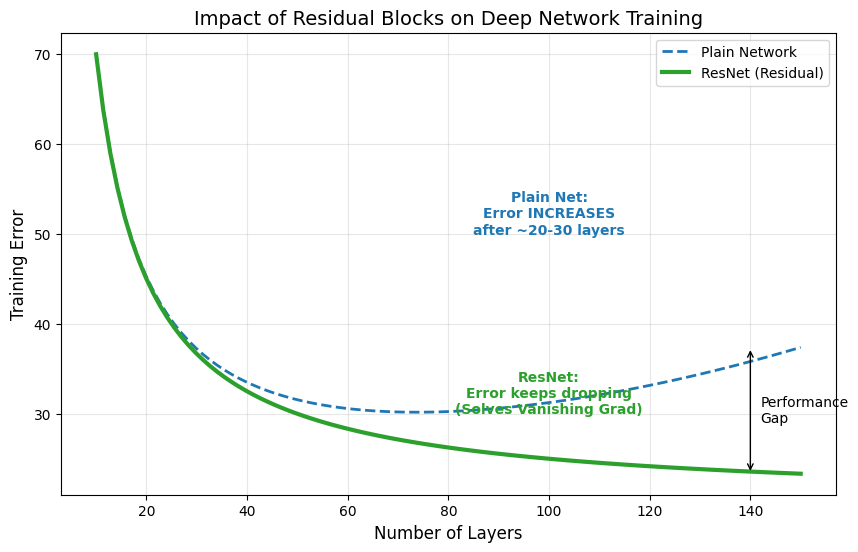

In [3]:
### Full Visualization Implementation
'''
This visualization reproduces the famous **"Training Error vs. Depth"** graph mentioned in the transcript.
It illustrates the fundamental difference between "Plain" networks (where error increases with depth) and "ResNets" 
(where error decreases).
'''

import matplotlib.pyplot as plt
import numpy as np

def visualize_resnet_vs_plain():
    # X-axis: Number of Layers
    layers = np.linspace(10, 150, 100)
    
    # Simulate "Plain" Network Error
    # Theory: Should go down. Reality: Goes down then UP due to vanishing gradients
    plain_error = 20 + 500/layers + (layers/40)**2 
    
    # Simulate "ResNet" Error
    # Reality: Continues to go down (or flatten) as layers increase
    resnet_error = 20 + 500/layers
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot Plain Net
    ax.plot(layers, plain_error, label='Plain Network', color='tab:blue', linewidth=2, linestyle='--')
    
    # Plot ResNet
    ax.plot(layers, resnet_error, label='ResNet (Residual)', color='tab:green', linewidth=3)
    
    # Annotations
    ax.set_xlabel('Number of Layers', fontsize=12)
    ax.set_ylabel('Training Error', fontsize=12)
    ax.set_title('Impact of Residual Blocks on Deep Network Training', fontsize=14)
    
    # Add text explaining the phenomenon
    ax.text(100, 30, "ResNet:\nError keeps dropping\n(Solves Vanishing Grad)", 
            color='tab:green', ha='center', fontweight='bold')
    
    ax.text(100, 50, "Plain Net:\nError INCREASES\nafter ~20-30 layers", 
            color='tab:blue', ha='center', fontweight='bold')

    # Draw arrow highlighting the gap
    ax.annotate('', xy=(140, resnet_error[-1]), xytext=(140, plain_error[-1]),
                arrowprops=dict(arrowstyle='<->', color='black'))
    ax.text(142, (resnet_error[-1] + plain_error[-1])/2, "Performance\nGap", va='center')

    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()

visualize_resnet_vs_plain()

# EX4. 

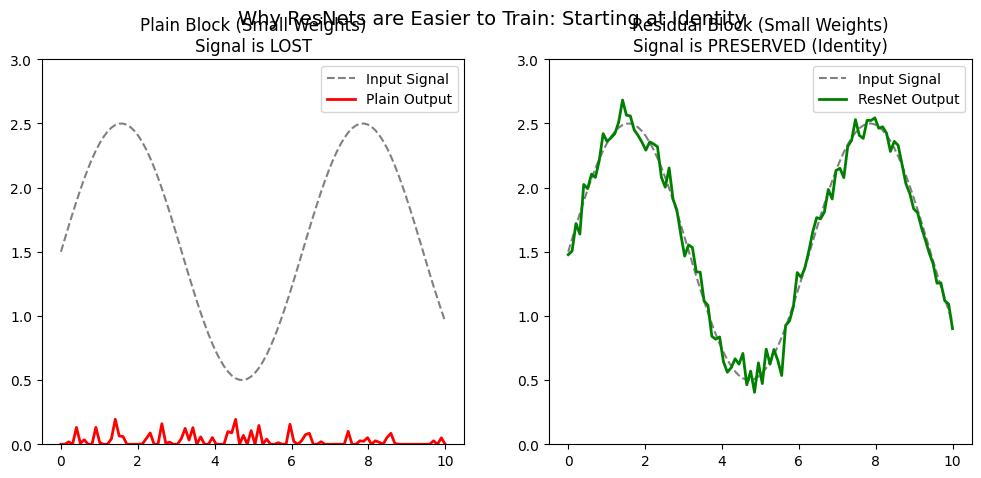

In [5]:
### Full Visualization Implementation

'''
This visualization compares a **Plain Block** vs. a **Residual Block** when initialized with small random weights.
* **Plain Block:** Output is noise (near zero), losing the original signal.
* **Residual Block:** Output is `Input + Noise`, preserving the original signal structure (Identity Mapping).
'''
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def simulate_signal_propagation():
    # 1. Create a "Signal" (e.g., a sine wave) representing useful features
    x = np.linspace(0, 10, 100)
    input_signal = np.sin(x) + 1.5 # Shift up so it's positive (like ReLU output)
    
    # 2. Define random weights (small values, mimicking initialization/regularization)
    # Simulating W * a + b where W is small
    noise_plain = np.random.normal(0, 0.1, 100) 
    
    # 3. Plain Block Output: g(W*a) -> g(noise)
    # The signal is mostly lost/distorted because W is small
    output_plain = relu(noise_plain)
    
    # 4. Residual Block Output: g(W*a + input) -> g(noise + input)
    # The signal is preserved because of the skip connection
    output_residual = relu(noise_plain + input_signal)
    
    # --- Plotting ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot Plain
    ax1.plot(x, input_signal, label='Input Signal', color='gray', linestyle='--')
    ax1.plot(x, output_plain, label='Plain Output', color='red', linewidth=2)
    ax1.set_title("Plain Block (Small Weights)\nSignal is LOST")
    ax1.set_ylim(0, 3)
    ax1.legend()
    
    # Plot Residual
    ax2.plot(x, input_signal, label='Input Signal', color='gray', linestyle='--')
    ax2.plot(x, output_residual, label='ResNet Output', color='green', linewidth=2)
    ax2.set_title("Residual Block (Small Weights)\nSignal is PRESERVED (Identity)")
    ax2.set_ylim(0, 3)
    ax2.legend()
    
    plt.suptitle("Why ResNets are Easier to Train: Starting at Identity", fontsize=14)
    plt.show()

simulate_signal_propagation()

# EX5. CHannel Reduction

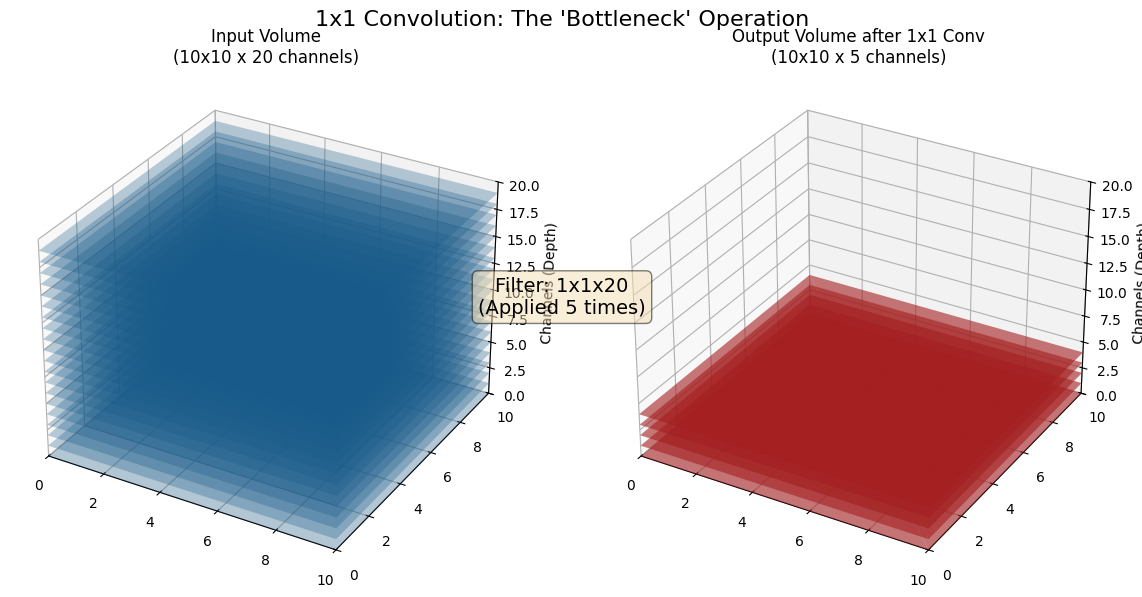

In [9]:
### Full Visualization Implementation
'''
This visualization demonstrates the **Channel Reduction** capability of $1 \times 1$ convolutions. 
It simulates a "Bottleneck" operation where a thick volume is compressed into a thin one.
'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualize_1x1_reduction():
    # Dimensions
    H, W = 10, 10
    C_in = 20   # Original Depth
    C_out = 5   # Reduced Depth
    
    # Create figure
    fig = plt.figure(figsize=(12, 6))
    
    # --- Plot 1: Input Volume ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    # Draw "Volume" as a stack of planes
    for i in range(C_in):
        z = i
        x = np.array([0, W, W, 0])
        y = np.array([0, 0, H, H])
        z_grid = np.array([z, z, z, z])
        # Use simple wireframe or surface to represent layers
        ax1.plot_trisurf(x, y, z_grid, alpha=0.3, color='tab:blue')
        
    ax1.set_title(f"Input Volume\n({H}x{W} x {C_in} channels)", fontsize=12)
    ax1.set_zlabel("Channels (Depth)")
    ax1.set_xlim(0, W); ax1.set_ylim(0, H); ax1.set_zlim(0, C_in)
    
    # --- Operation Arrow ---
    # (Conceptual text in the middle)
    
    # --- Plot 2: Output Volume ---
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    for i in range(C_out):
        z = i
        x = np.array([0, W, W, 0])
        y = np.array([0, 0, H, H])
        z_grid = np.array([z, z, z, z])
        ax2.plot_trisurf(x, y, z_grid, alpha=0.6, color='tab:red')
        
    ax2.set_title(f"Output Volume after 1x1 Conv\n({H}x{W} x {C_out} channels)", fontsize=12)
    ax2.set_zlabel("Channels (Depth)")
    ax2.set_xlim(0, W); ax2.set_ylim(0, H); ax2.set_zlim(0, C_in) # Keep scale same to show shrinking
    
    # Add annotation text
    plt.suptitle("1x1 Convolution: The 'Bottleneck' Operation", fontsize=16)
    plt.figtext(0.5, 0.5, "Filter: 1x1x20\n(Applied 5 times)", ha="center", va="center", fontsize=14, 
                bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
    
    plt.tight_layout()
    plt.show()

visualize_1x1_reduction()

# EX 6

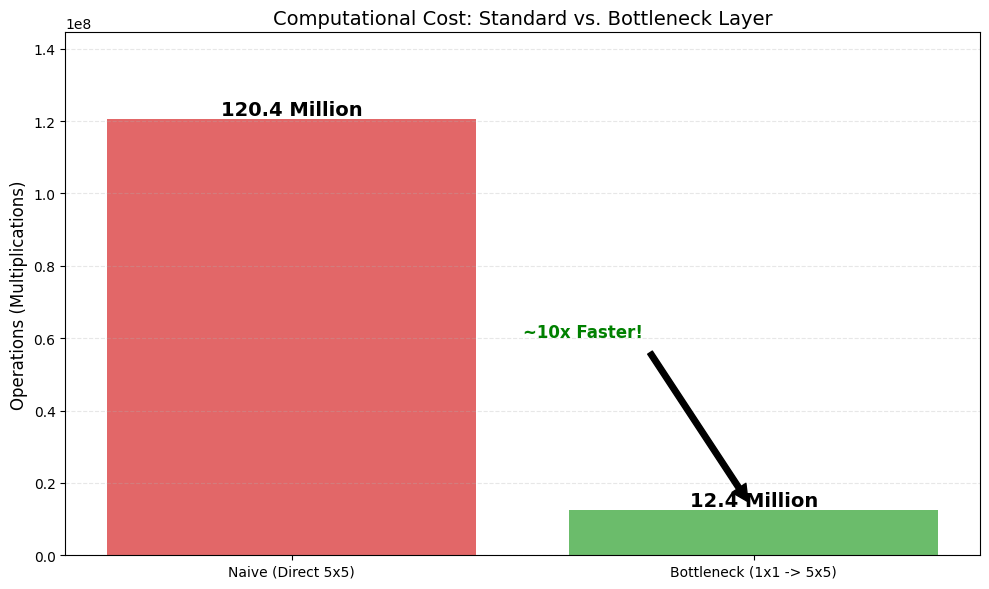

In [11]:
### Full Visualization Implementation

'''
This script visualizes the **Cost Savings** calculation derived in the transcript. 
It compares the "Naive" approach vs. the "Bottleneck" approach using a bar chart.
'''
import matplotlib.pyplot as plt

def visualize_computational_cost():
    # --- Parameters from Transcript ---
    input_h, input_w = 28, 28
    in_channels = 192
    out_channels = 32
    filter_size = 5
    
    bottleneck_channels = 16 # The reduced size
    
    # --- 1. Naive Cost ---
    # Cost = Output_Pixels * Filter_Volume
    # (28*28*32) * (5*5*192)
    output_pixels = input_h * input_w * out_channels
    filter_ops = filter_size * filter_size * in_channels
    naive_cost = output_pixels * filter_ops
    
    # --- 2. Bottleneck Cost ---
    # Step A: 1x1 Compression (192 -> 16)
    # Output: 28*28*16
    pixels_A = input_h * input_w * bottleneck_channels
    ops_A = 1 * 1 * in_channels
    cost_A = pixels_A * ops_A
    
    # Step B: 5x5 Convolution (16 -> 32)
    # Output: 28*28*32
    pixels_B = input_h * input_w * out_channels
    ops_B = filter_size * filter_size * bottleneck_channels
    cost_B = pixels_B * ops_B
    
    bottleneck_total_cost = cost_A + cost_B
    
    # --- Plotting ---
    labels = ['Naive (Direct 5x5)', 'Bottleneck (1x1 -> 5x5)']
    costs = [naive_cost, bottleneck_total_cost]
    colors = ['tab:red', 'tab:green']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(labels, costs, color=colors, alpha=0.7)
    
    # Add text labels
    ax.set_ylabel('Operations (Multiplications)', fontsize=12)
    ax.set_title('Computational Cost: Standard vs. Bottleneck Layer', fontsize=14)
    
    # Annotate bars
    for bar, cost in zip(bars, costs):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{cost/1e6:.1f} Million',
                ha='center', va='bottom', fontsize=14, fontweight='bold')
        
    # Add "Savings" arrow
    ax.annotate(f'~{naive_cost/bottleneck_total_cost:.0f}x Faster!', 
                xy=(1, bottleneck_total_cost), xytext=(0.5, naive_cost/2),
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, fontweight='bold', color='green')

    plt.ylim(0, naive_cost * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

visualize_computational_cost()

# EX7 INCEPTION MODULE 

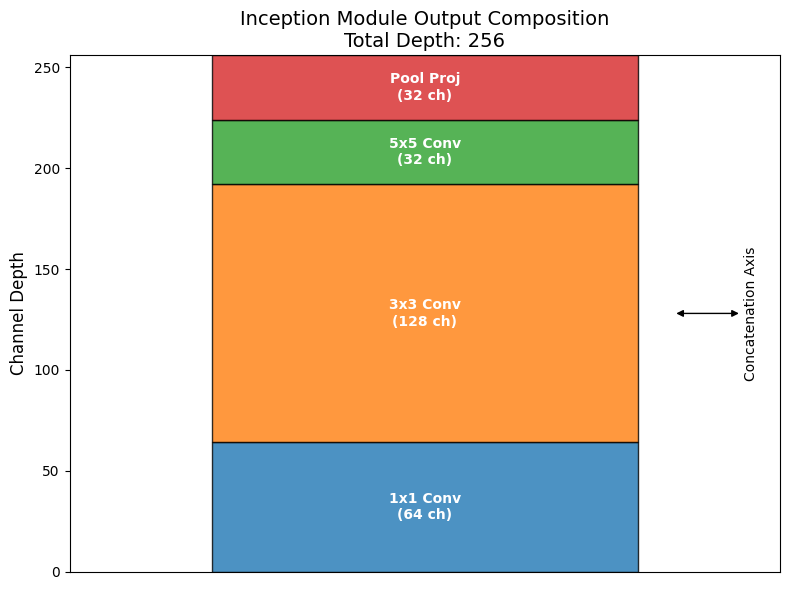

In [2]:
### Full Visualization Implementation
'''
This script visualizes the **structure of the Inception Module output**. 
It shows how the four separate branches contribute different "chunks" to the final concatenated depth.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_inception_output():
    # Channels for each branch (from transcript example)
    # Total Output = 256
    branches = {
        '1x1 Conv': 64,
        '3x3 Conv': 128,
        '5x5 Conv': 32,
        'Pool Proj': 32
    }
    
    total_channels = sum(branches.values())
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Starting vertical position
    current_y = 0
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    # Draw the "Concatenated Volume" as a stack of blocks
    for (name, channels), color in zip(branches.items(), colors):
        # Draw rectangle representing the chunk of channels
        # Width = constant (representing 28x28 spatial size), Height = channels
        rect = patches.Rectangle((0.2, current_y), 0.6, channels, 
                                 linewidth=1, edgecolor='black', facecolor=color, alpha=0.8)
        ax.add_patch(rect)
        
        # Annotation
        ax.text(0.5, current_y + channels/2, f"{name}\n({channels} ch)", 
                ha='center', va='center', color='white', fontweight='bold')
        
        current_y += channels

    # Styling
    ax.set_xlim(0, 1)
    ax.set_ylim(0, total_channels)
    ax.set_ylabel("Channel Depth", fontsize=12)
    ax.set_xticks([])
    ax.set_title(f"Inception Module Output Composition\nTotal Depth: {total_channels}", fontsize=14)
    
    # Add arrow showing concatenation
    ax.annotate('Concatenation Axis', xy=(0.85, total_channels/2), xytext=(0.95, total_channels/2),
                arrowprops=dict(facecolor='black', arrowstyle='<|-|>'),
                rotation=90, va='center')

    plt.tight_layout()
    plt.show()

visualize_inception_output()

# EX8 Mobile NET 

Standard Conv Cost: 2160
Depthwise Cost:     432
Pointwise Cost:     240
Separable Total:    672
Ratio: 0.31


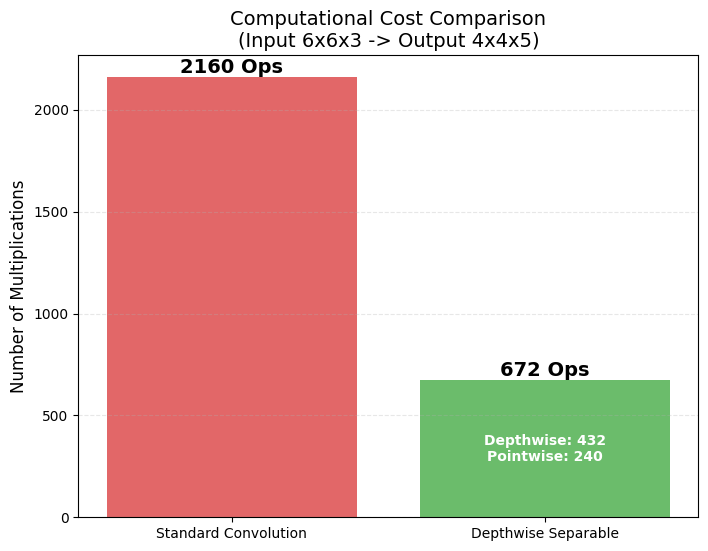

In [4]:
### Full Visualization Implementation
'''
This script visualizes the **computational savings** using the exact numbers from the transcript 
(6 X 6 X 3 input). It generates a bar chart comparing the operations count.
'''
import matplotlib.pyplot as plt

def compare_mobilenet_cost():
    # --- Parameters from Transcript Example ---
    # Input: 6x6x3 -> Output: 4x4x5 (using 3x3 filters)
    n_in = 6
    n_out = 4
    n_c = 3      # Input channels
    n_c_prime = 5 # Output filters
    f = 3        # Filter size
    
    # --- 1. Standard Convolution Cost ---
    # f * f * n_c * n_out * n_out * n_c_prime
    std_ops_per_position = f * f * n_c
    positions = n_out * n_out
    std_total = std_ops_per_position * positions * n_c_prime
    
    # --- 2. Depthwise Separable Cost ---
    # Step A: Depthwise (f * f * n_out * n_out * n_c)
    dw_ops = f * f * positions * n_c
    
    # Step B: Pointwise (1 * 1 * n_c * n_out * n_out * n_c_prime)
    pw_ops = 1 * 1 * n_c * positions * n_c_prime
    
    sep_total = dw_ops + pw_ops
    
    # --- Visualization ---
    print(f"Standard Conv Cost: {std_total}")
    print(f"Depthwise Cost:     {dw_ops}")
    print(f"Pointwise Cost:     {pw_ops}")
    print(f"Separable Total:    {sep_total}")
    print(f"Ratio: {sep_total/std_total:.2f}")

    labels = ['Standard Convolution', 'Depthwise Separable']
    values = [std_total, sep_total]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, values, color=['tab:red', 'tab:green'], alpha=0.7)
    
    # Annotations
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val} Ops', ha='center', va='bottom', fontsize=14, fontweight='bold')
        
    # Breakdown annotation for Separable
    ax.text(1, sep_total/2, f"Depthwise: {dw_ops}\nPointwise: {pw_ops}", 
            ha='center', va='center', color='white', fontweight='bold')

    ax.set_ylabel('Number of Multiplications', fontsize=12)
    ax.set_title(f'Computational Cost Comparison\n(Input 6x6x3 -> Output 4x4x5)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()

compare_mobilenet_cost()

# EX9 MobileNET Architecture

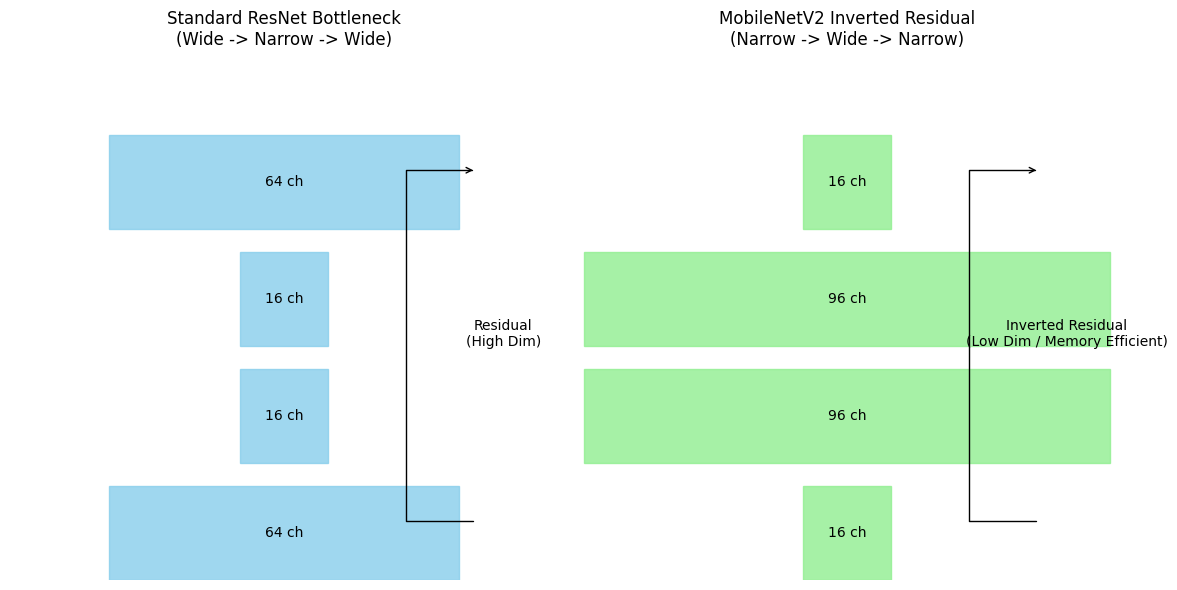

In [6]:
### Full Visualization Implementation
'''
This visualization compares the **"Classic Bottleneck" (ResNet)** structure vs. the **"Inverted Residual" (MobileNet v2)** structure, highlighting where the "fat" (high channel count) layers are located.
'''

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_inverted_residual():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # --- 1. ResNet Bottleneck (Wide -> Narrow -> Wide) ---
    # Input (Wide) -> 1x1 Compress -> 3x3 -> 1x1 Expand -> Output (Wide)
    # Skip connection connects Wide layers
    widths_resnet = [64, 16, 16, 64] 
    y_pos = [0, 1, 2, 3]
    
    for w, y in zip(widths_resnet, y_pos):
        rect = patches.Rectangle((50 - w/2, y), w, 0.8, color='skyblue', alpha=0.8)
        ax1.add_patch(rect)
        ax1.text(50, y+0.4, f"{w} ch", ha='center', va='center')

    # Skip Connection
    ax1.annotate("", xy=(85, 3.5), xytext=(85, 0.5), arrowprops=dict(arrowstyle="->", connectionstyle="bar,fraction=-0.2"))
    ax1.text(90, 2, "Residual\n(High Dim)", ha='center')

    ax1.set_xlim(0, 100); ax1.set_ylim(0, 4.5)
    ax1.set_title("Standard ResNet Bottleneck\n(Wide -> Narrow -> Wide)")
    ax1.axis('off')

    # --- 2. MobileNetV2 Inverted Residual (Narrow -> Wide -> Narrow) ---
    # Input (Narrow) -> 1x1 Expand -> 3x3 -> 1x1 Project -> Output (Narrow)
    # Skip connection connects Narrow layers
    widths_mobilenet = [16, 96, 96, 16] # Expansion factor 6
    
    for w, y in zip(widths_mobilenet, y_pos):
        rect = patches.Rectangle((50 - w/2, y), w, 0.8, color='lightgreen', alpha=0.8)
        ax2.add_patch(rect)
        ax2.text(50, y+0.4, f"{w} ch", ha='center', va='center')

    # Skip Connection
    ax2.annotate("", xy=(85, 3.5), xytext=(85, 0.5), arrowprops=dict(arrowstyle="->", connectionstyle="bar,fraction=-0.2"))
    ax2.text(90, 2, "Inverted Residual\n(Low Dim / Memory Efficient)", ha='center')

    ax2.set_xlim(0, 100); ax2.set_ylim(0, 4.5)
    ax2.set_title("MobileNetV2 Inverted Residual\n(Narrow -> Wide -> Narrow)")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

visualize_inverted_residual()

# RESTNET VS MOBILE 2

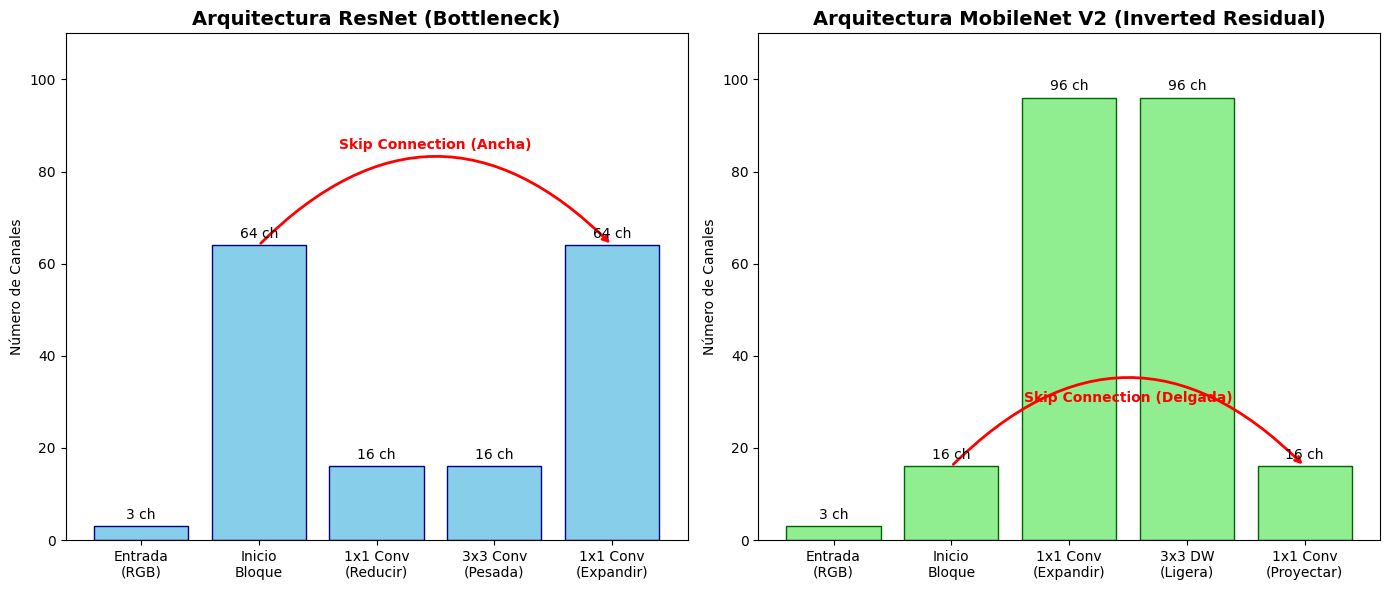

In [7]:
import matplotlib.pyplot as plt

def plot_architectures():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # --- DATOS RESNET (Wide -> Narrow -> Wide) ---
    # Flujo: Entrada RGB (3) -> Inicio Bloque (64) -> Reducción (16) -> Expansión (64)
    resnet_stages = ['Entrada\n(RGB)', 'Inicio\nBloque', '1x1 Conv\n(Reducir)', '3x3 Conv\n(Pesada)', '1x1 Conv\n(Expandir)']
    resnet_channels = [3, 64, 16, 16, 64]
    
    # --- DATOS MOBILENET V2 (Narrow -> Wide -> Narrow) ---
    # Flujo: Entrada RGB (3) -> Inicio Bloque (16) -> Expansión (96) -> Proyección (16)
    mbnet_stages = ['Entrada\n(RGB)', 'Inicio\nBloque', '1x1 Conv\n(Expandir)', '3x3 DW\n(Ligera)', '1x1 Conv\n(Proyectar)']
    mbnet_channels = [3, 16, 96, 96, 16]

    # Graficar ResNet
    bars1 = ax1.bar(resnet_stages, resnet_channels, color='skyblue', edgecolor='navy')
    ax1.set_title('Arquitectura ResNet (Bottleneck)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Número de Canales')
    ax1.set_ylim(0, 110)
    
    # Dibujar Skip Connection en ResNet
    ax1.annotate('', xy=(4, 64), xycoords='data', xytext=(1, 64), textcoords='data',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.5", color="red", lw=2))
    ax1.text(2.5, 85, 'Skip Connection (Ancha)', color='red', ha='center', fontweight='bold')

    # Graficar MobileNet V2
    bars2 = ax2.bar(mbnet_stages, mbnet_channels, color='lightgreen', edgecolor='darkgreen')
    ax2.set_title('Arquitectura MobileNet V2 (Inverted Residual)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Número de Canales')
    ax2.set_ylim(0, 110)
    
    # Dibujar Skip Connection en MobileNet
    ax2.annotate('', xy=(4, 16), xycoords='data', xytext=(1, 16), textcoords='data',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.5", color="red", lw=2))
    ax2.text(2.5, 30, 'Skip Connection (Delgada)', color='red', ha='center', fontweight='bold')

    # Añadir etiquetas de valores sobre las barras
    for bars, ax in [(bars1, ax1), (bars2, ax2)]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{int(height)} ch', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_architectures()

# EX 10  EfficientNET

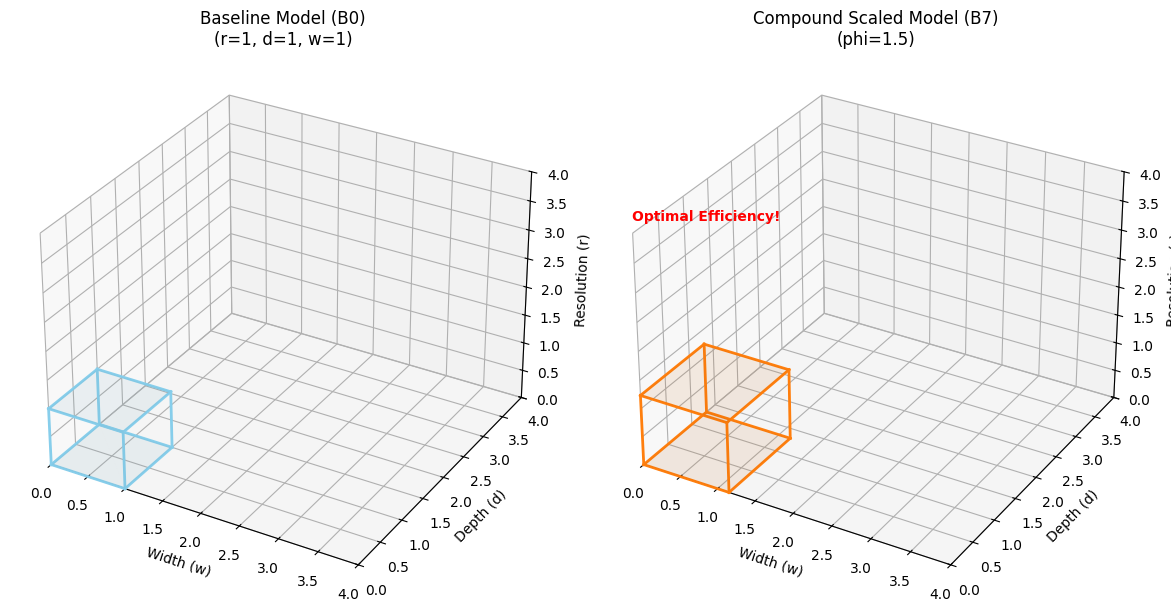

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualize_compound_scaling_fixed():
    fig = plt.figure(figsize=(12, 6))
    
    # --- Helper Function to Draw a Wireframe Box ---
    def draw_box(ax, w, d, r, color, title):
        # Vertices of the box
        # Origin is (0,0,0) -> Max corner is (w, d, r)
        corners = np.array([
            [0, 0, 0], [w, 0, 0], [w, d, 0], [0, d, 0],  # Bottom face
            [0, 0, r], [w, 0, r], [w, d, r], [0, d, r]   # Top face
        ])
        
        # Define edges by connecting vertex indices
        edges = [
            [0,1], [1,2], [2,3], [3,0], # Bottom perimeter
            [4,5], [5,6], [6,7], [7,4], # Top perimeter
            [0,4], [1,5], [2,6], [3,7]  # Vertical pillars
        ]
        
        # Plot edges
        for edge in edges:
            ax.plot3D(corners[edge, 0], corners[edge, 1], corners[edge, 2], color=color, linewidth=2)
            
        # Draw semi-transparent surfaces (Front, Back, Left, Right, Top, Bottom)
        # We simplify by just plotting the bounding planes
        x = [0, w, w, 0]; y = [0, 0, d, d]; z = [0, 0, 0, 0] # Bottom
        ax.plot_trisurf(x, y, z, color=color, alpha=0.1)
        
        x = [0, w, w, 0]; y = [0, 0, d, d]; z = [r, r, r, r] # Top
        ax.plot_trisurf(x, y, z, color=color, alpha=0.1)
        
        # Settings
        ax.set_title(title)
        ax.set_xlabel('Width (w)'); ax.set_ylabel('Depth (d)'); ax.set_zlabel('Resolution (r)')
        ax.set_xlim(0, 4); ax.set_ylim(0, 4); ax.set_zlim(0, 4)

    # --- 1. Baseline Model (B0) ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    # Baseline dimensions
    r0, d0, w0 = 1.0, 1.0, 1.0
    draw_box(ax1, w0, d0, r0, 'skyblue', "Baseline Model (B0)\n(r=1, d=1, w=1)")
    
    # --- 2. Scaled Model (Compound Scaling) ---
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    
    # Hypothetical Compound Scaling parameters
    phi = 1.5 # Scale factor
    alpha, beta, gamma = 1.2, 1.1, 1.15 # Constants derived from grid search
    
    # Calculate new dimensions
    r_new = r0 * (gamma ** phi) 
    d_new = d0 * (alpha ** phi) 
    w_new = w0 * (beta ** phi) 
    
    draw_box(ax2, w_new, d_new, r_new, 'tab:orange', f"Compound Scaled Model (B7)\n(phi={phi})")
    
    # Annotation for the result
    ax2.text(0, 0, 4.2, "Optimal Efficiency!", color='red', fontweight='bold')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_compound_scaling_fixed()

# EX 11

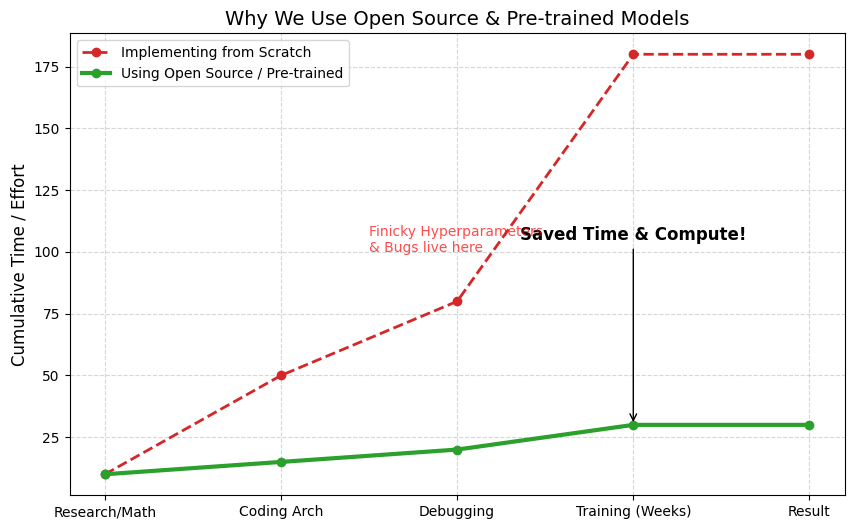

In [3]:
### Full Visualization Implementation
'''
This visualization illustrates the **Efficiency Gap** between implementing from scratch versus using open source. 
It simulates the "time to first result" for both approaches.
'''
import matplotlib.pyplot as plt

def visualize_workflow_efficiency():
    # Stages of a project
    stages = ['Research/Math', 'Coding Arch', 'Debugging', 'Training (Weeks)', 'Result']
    
    # Time taken (Hypothetical arbitrary units)
    # Scratch: Huge time coding/debugging, massive training time
    time_scratch = [10, 40, 30, 100, 0] 
    
    # Open Source: Minimal coding, Minimal training (if using pre-trained), fast result
    time_opensource = [10, 5, 5, 10, 0] # Transfer learning reduces training time massively
    
    # Cumulative time
    cumulative_scratch = [sum(time_scratch[:i+1]) for i in range(len(time_scratch))]
    cumulative_opensource = [sum(time_opensource[:i+1]) for i in range(len(time_opensource))]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot curves
    ax.plot(stages, cumulative_scratch, marker='o', label='Implementing from Scratch', 
            color='tab:red', linestyle='--', linewidth=2)
    ax.plot(stages, cumulative_opensource, marker='o', label='Using Open Source / Pre-trained', 
            color='tab:green', linewidth=3)
    
    # Annotations
    ax.set_ylabel('Cumulative Time / Effort', fontsize=12)
    ax.set_title('Why We Use Open Source & Pre-trained Models', fontsize=14)
    
    # Highlight the gap
    final_gap = cumulative_scratch[-2] - cumulative_opensource[-2]
    ax.annotate(f'Saved Time & Compute!', 
                xy=(3, cumulative_opensource[-2]), 
                xytext=(3, (cumulative_scratch[-2] + cumulative_opensource[-2])/2),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                ha='center', fontsize=12, fontweight='bold')
    
    # Text
    ax.text(1.5, 100, "Finicky Hyperparameters\n& Bugs live here", color='red', alpha=0.7)
    
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()
    plt.show()

visualize_workflow_efficiency()

# EX12

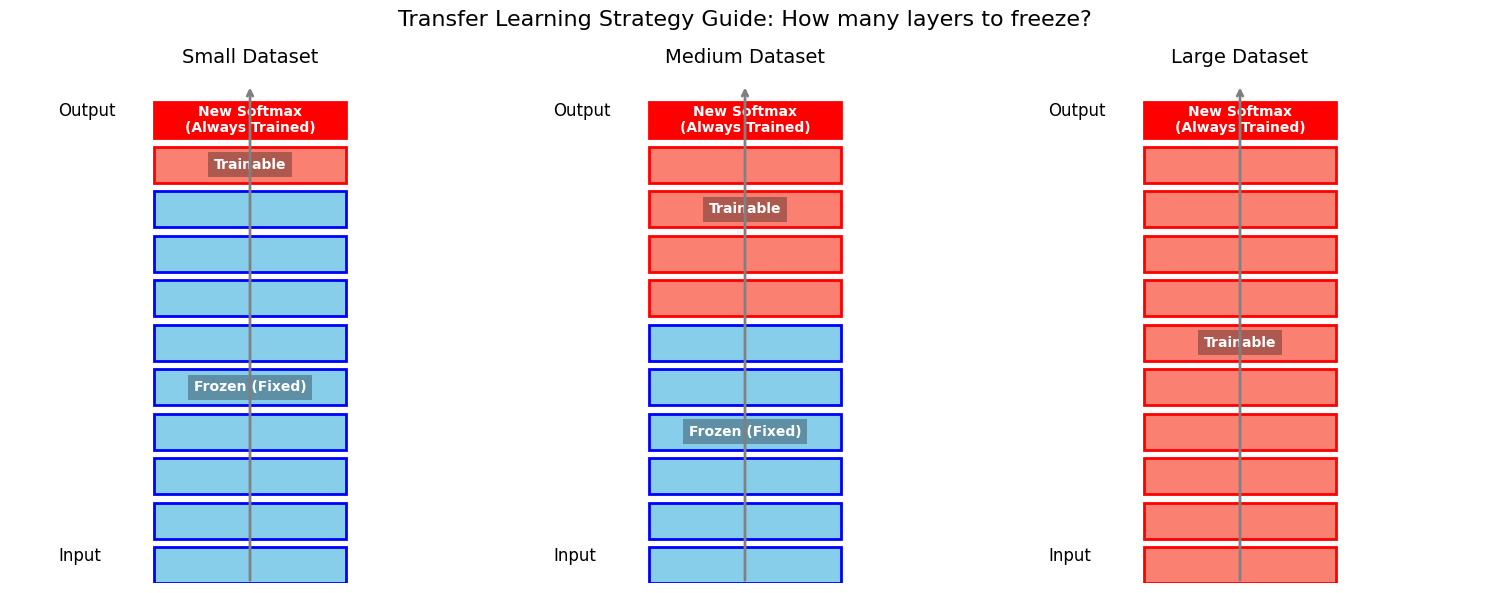

In [4]:
### Full Visualization Implementation
'''
This visualization illustrates the **"Freezing Spectrum"**. 
It shows a deep neural network and uses color coding to demonstrate which layers are **Frozen (Blue)** vs. 
**Trainable (Red)** based on the dataset size scenarios discussed in the transcript.
'''
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_transfer_learning_strategies():
    # Define layers conceptual depth
    layers = 10
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    strategies = [
        ("Small Dataset", 9),   # Freeze 9, Train 1
        ("Medium Dataset", 6),  # Freeze 6, Train 4
        ("Large Dataset", 0)    # Freeze 0, Train 10 (Fine-tune all)
    ]
    
    for ax, (title, freeze_count) in zip(axes, strategies):
        # Draw Layers
        for i in range(layers):
            # Determine color: Blue = Frozen, Red = Trainable
            if i < freeze_count:
                color = 'skyblue'
                label = "Frozen (Fixed)" if i == freeze_count//2 else ""
                edge = 'blue'
            else:
                color = 'salmon'
                label = "Trainable" if i == freeze_count + (layers-freeze_count)//2 else ""
                edge = 'red'
                
            # Draw Box
            rect = patches.Rectangle((0.3, i), 0.4, 0.8, linewidth=2, edgecolor=edge, facecolor=color)
            ax.add_patch(rect)
            
            # Label
            if label:
                ax.text(0.5, i+0.4, label, ha='center', va='center', fontweight='bold', color='white', fontsize=10,
                        bbox=dict(facecolor='black', alpha=0.3, edgecolor='none'))

        # Draw "New Head"
        head_rect = patches.Rectangle((0.3, layers), 0.4, 0.8, linewidth=2, edgecolor='red', facecolor='red')
        ax.add_patch(head_rect)
        ax.text(0.5, layers+0.4, "New Softmax\n(Always Trained)", ha='center', va='center', color='white', fontweight='bold')

        # Formatting
        ax.set_xlim(0, 1)
        ax.set_ylim(0, layers + 1.5)
        ax.set_title(title, fontsize=14)
        ax.axis('off')
        
        # Arrow indicating data flow
        ax.annotate('', xy=(0.5, layers+1.2), xytext=(0.5, 0),
                    arrowprops=dict(arrowstyle='->', color='gray', lw=2))
        ax.text(0.1, 0.5, "Input", fontsize=12)
        ax.text(0.1, layers+0.5, "Output", fontsize=12)

    plt.suptitle("Transfer Learning Strategy Guide: How many layers to freeze?", fontsize=16)
    plt.tight_layout()
    plt.show()

visualize_transfer_learning_strategies()

# EX13

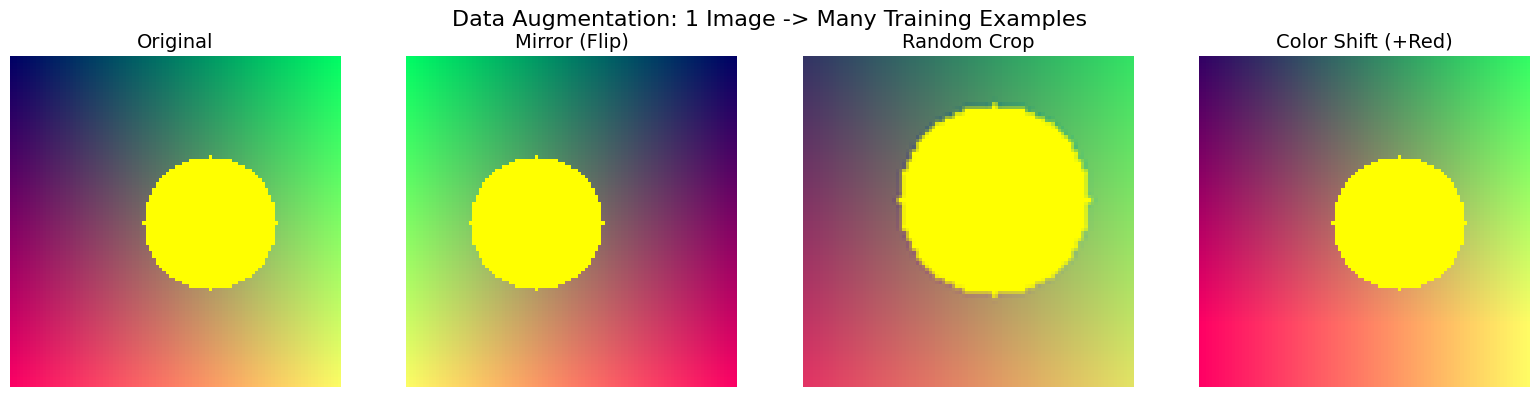

In [5]:
### Full Visualization Implementation
'''
This visualization demonstrates the effect of various augmentations on a single sample image,
showing how one image can generate diverse training samples.
'''
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def visualize_augmentations():
    # 1. Create a dummy image (Gradient + Shape)
    h, w = 100, 100
    img_np = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            img_np[i, j] = [i * 255 // h, j * 255 // w, 100] # Gradient
    
    # Add a "Cat" (Yellow Circle)
    center_y, center_x = 50, 60
    radius = 20
    y, x = np.ogrid[:h, :w]
    mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2
    img_np[mask] = [255, 255, 0]
    
    pil_img = Image.fromarray(img_np)

    # 2. Define Augmentations (Manual simulation for clarity)
    # Mirror
    img_flip = pil_img.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Crop
    img_crop = pil_img.crop((20, 20, 90, 90)).resize((100, 100))
    
    # Color Shift (Simulated)
    arr_shift = np.array(pil_img, dtype=np.int16)
    arr_shift[:, :, 0] += 50 # Add Red
    arr_shift = np.clip(arr_shift, 0, 255).astype(np.uint8)
    img_color = Image.fromarray(arr_shift)

    # 3. Plot
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    titles = ["Original", "Mirror (Flip)", "Random Crop", "Color Shift (+Red)"]
    images = [pil_img, img_flip, img_crop, img_color]
    
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title, fontsize=14)
        ax.axis('off')
        
    plt.suptitle("Data Augmentation: 1 Image -> Many Training Examples", fontsize=16)
    plt.tight_layout()
    plt.show()

visualize_augmentations()